# Modeling
File ini merupakan file yang digunakan melatih dan menguji model berdasarkan dataset yang telah dibersihkan pada tahapan data exploration dan preprocessing. Selain itu akan dilakukan evaluasi, dan uji dengan data baru.

## Import Library
- Bagian ini merupakan bagian untuk mengimpor library yang dibutuhkan.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

import joblib

import warnings
warnings.filterwarnings('ignore')

## Read Dataset
- Tahapan untuk membaca dataset bersih.

In [2]:
df = pd.read_csv('../data/clean/question_list_modeling.csv')
df = df.drop(columns='Unnamed: 0')

df.head()

,question,label
0,internet mati nih,Problem
1,harga stb berapa,Information
2,internet putus sambung,Problem
3,saya dapat isi formulir relokasi disubmit blank,Problem
4,ketika laku bayar dapat proses,Problem


## Train Test Split
- Tahapan yang dilakukan untuk membagi dataset menjadi 2 bagian yakni data train (80%), dan data test (20%) yang digunakan untuk melatih model.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    df['question'],
    df['label'],
    test_size=0.2,
    random_state=42,
    stratify=df['label']
)

## Label Encoder
- Tahapan ini merupakan tahapan untuk mengubah label dari string menjadi bentuk angka.

In [4]:
le = LabelEncoder()
y_encoded = le.fit_transform(y_train)

## Tf-idf Vectorizer
- Tahapan yang dilakukan untuk mengubah teks menjadi representasi angka agar bisa digunakan untuk melatih model.

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## Weighting
- Tahapan ini dilakukan untuk memberi bobot pada setiap kelas, karena adanya ketidakseimbangan jumlah data pada tiap kelasnya.

In [6]:
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

## Fungsi Evaluasi
- Tahapan ini dilakukan untuk membuat fungsi yang akan digunakan untuk evaluasi model machine learning.

In [ ]:
def evaluate_model(model, y_test, X_test_tfidf):
    """
    Args:
        model (_type_): _description_
        y_test (_type_): _description_
        X_test_tfidf (_type_): _description_

    Returns:
        _type_: _description_
    """
    y_pred = model.predict(X_test_tfidf)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    return y_pred
    
    
def confussion_matrix(y_pred, y_test):
    """_summary_

    Args:
        y_pred (_type_): _description_
        y_test (_type_): _description_

    Returns:
        _type_: _description_
    """
    
    cm = confusion_matrix(y_test, y_pred, labels=le.classes_)
    
    return cm
    

## 1. Model Logistic Regression

### Melatih Model
- Tahapan ini dilakukan untuk melatih model Logistic Regression.

In [8]:
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train_tfidf, y_train, sample_weight=sample_weights)

LogisticRegression(max_iter=500)

### Evaluasi Model
- Tahapan ini dilakukan untuk mengevaluasi model Logistic Regression dengan metrik evaluasi Accuracy, Precision, Recall, dan F1 Score.

In [9]:
y_pred_lr = evaluate_model(lr_model, y_test, X_test_tfidf)

Accuracy: 0.7962085308056872
Precision: 0.7980545362758912
Recall: 0.7962085308056872
F1 Score: 0.7969608064394795

Classification Report:
               precision    recall  f1-score   support

 Information       0.88      0.88      0.88       140
     Problem       0.74      0.69      0.71        36
     Request       0.54      0.57      0.56        35

    accuracy                           0.80       211
   macro avg       0.72      0.71      0.72       211
weighted avg       0.80      0.80      0.80       211



### Confussion Matrix
- Tahapan ini dilakukan untuk mengevaluasi model Logistic Regression dengan confussion matrix untuk melihat hasil prediksi model pada setiap kelasnya.

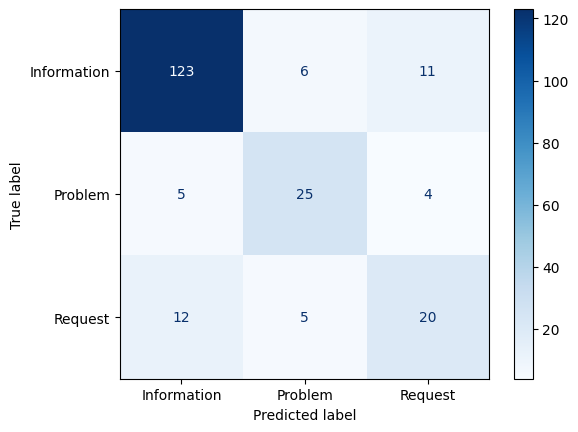

In [11]:
cm_lr = confusion_matrix(y_pred_lr, y_test)

disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=le.classes_)
disp_lr.plot(cmap='Blues')

## 2. Model Random Forest

### Melatih Model
- Tahapan ini dilakukan untuk melatih model Random Forest.

In [12]:
rf_model = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

### Evaluasi Model
- Tahapan ini dilakukan untuk mengevaluasi model Random Forest dengan metrik evaluasi Accuracy, Precision, Recall, dan F1 Score.

In [13]:
y_pred_rf = evaluate_model(rf_model, y_test, X_test_tfidf)

Accuracy: 0.7914691943127962
Precision: 0.7794669785191112
Recall: 0.7914691943127962
F1 Score: 0.7710778069171151

Classification Report:
               precision    recall  f1-score   support

 Information       0.81      0.95      0.87       140
     Problem       0.79      0.61      0.69        36
     Request       0.67      0.34      0.45        35

    accuracy                           0.79       211
   macro avg       0.75      0.63      0.67       211
weighted avg       0.78      0.79      0.77       211



### Confussion Matrix
- Tahapan ini dilakukan untuk mengevaluasi model Random Forest dengan confussion matrix untuk melihat hasil prediksi model pada setiap kelasnya.

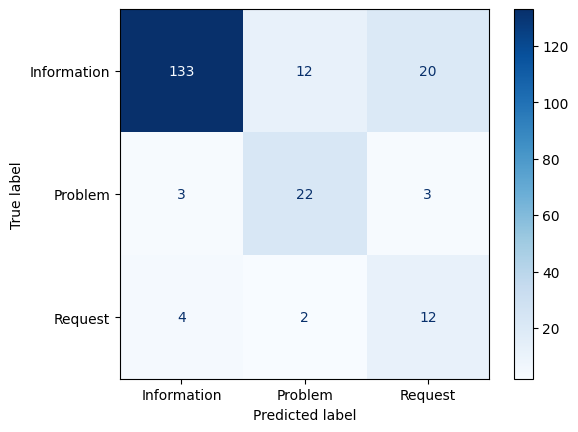

In [14]:
cm_rf = confusion_matrix(y_pred_rf, y_test)

disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=le.classes_)
disp_lr.plot(cmap='Blues')

## 3. Model SVM

### Melatih Model
- Tahapan ini dilakukan untuk melatih model SVM.

In [15]:
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_model.fit(X_train_tfidf, y_train)

SVC(class_weight='balanced', kernel='linear', random_state=42)

### Evaluasi Model
- Tahapan ini dilakukan untuk mengevaluasi model SVM dengan metrik evaluasi Accuracy, Precision, Recall, dan F1 Score.

In [16]:
y_pred_svm = evaluate_model(svm_model, y_test, X_test_tfidf)

Accuracy: 0.8151658767772512
Precision: 0.8146517121635606
Recall: 0.8151658767772512
F1 Score: 0.8143869229438008

Classification Report:
               precision    recall  f1-score   support

 Information       0.87      0.89      0.88       140
     Problem       0.78      0.69      0.74        36
     Request       0.61      0.63      0.62        35

    accuracy                           0.82       211
   macro avg       0.76      0.74      0.75       211
weighted avg       0.81      0.82      0.81       211



### Confussion Matrix
- Tahapan ini dilakukan untuk mengevaluasi model RSV< dengan confussion matrix untuk melihat hasil prediksi model pada setiap kelasnya.

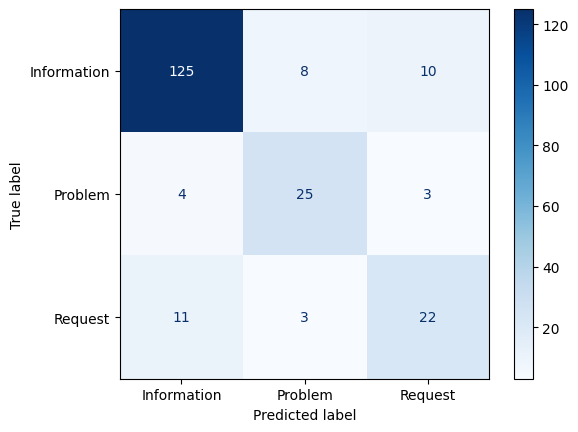

In [17]:
cm_svm = confusion_matrix(y_pred_svm, y_test)

disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=le.classes_)
disp_svm.plot(cmap='Blues')

## Summary
- Berdasarkan hasil evaluasi, dapat dilihat bahwa model dengan performa terbaik dimiliki oleh model SVM dengan akurasi di angka 0.82

## Predict with New Data

### Import Library

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re
import string

### Preprocessing Data Input
- Tahapan ini dilakukan untuk melakukan preprocessing data input, agar sesuai dengan model yang telah dibuat.

In [ ]:
factory_sw = StopWordRemoverFactory()
stopword_remover = factory_sw.create_stop_word_remover()

factory_stem = StemmerFactory()
stemmer = factory_stem.create_stemmer()

def preprocess_text(text):
    # Lowercase
    text = str(text).lower()
    
    # Remove noise
    text = re.sub(r'http\S+|www\.\S+', '', text)
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove stopwords
    text = stopword_remover.remove(text)
    
    # Stemming
    text = stemmer.stem(text)
    
    return text

### Predict New Input
- Tahapan ini merupakan tahapan untuk mengklasifikasikan teks input baru dengan model terbaik.

In [27]:
def predict_category(text):
    text = preprocess_text(text)
    vect = vectorizer.transform([text]) 
    return svm_model.predict(vect)[0] 

- Hasil prediksi model

In [36]:
predict_category("Ping saya tinggi")

'Problem'

In [37]:
predict_category("Wifi saya bermasalah, bisa kirimkan teknisi?")

'Problem'

In [38]:
predict_category("Saya mau tau paket di Biznet")

'Information'

- Hasil prediksi dari model SVM sudah baik dalam mengklasifikasikan data input baru ke dalam kelas yang sesuai.

## Save Model
- Tahapan ini merupakan tahapan untuk menyimpan model terbaik.

In [41]:
joblib.dump(svm_model, '../models/svm_model.pkl') 
joblib.dump(vectorizer, '../models/tfidf_vectorizer.pkl')
joblib.dump(le, '../models/label_encoder.pkl')

['../models/label_encoder.pkl']